In [ ]:
!pip install bertopic

In [ ]:
!pip install langdetect

In [ ]:
import tensorflow as tf

In [ ]:
from bertopic import BERTopic

In [ ]:
import sys
sys.executable

'/usr/bin/python3'

In [ ]:
!{sys.executable} -m pip install langdetect

In [ ]:
import pandas as pd
from numpy import nan
from sklearn.feature_extraction.text import CountVectorizer
from langdetect import detect

In [ ]:
# Load the data
df_may23 = pd.read_csv("vira_logs_2023-08-30.csv")

# Convert 'date' column to datetime format
df_may23['date'] = pd.to_datetime(df_may23['date'], errors='coerce')

start_date = "2021-07-01"
end_date = "2023-05-31"
mask = (df_may23['date'] >= start_date) & (df_may23['date'] <= end_date)
df_may23 = df_may23[mask]


<ipython-input-8-0ed73cc6d04d>:2: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_may23 = pd.read_csv("vira_logs_2023-08-30.csv")


In [ ]:
df_may23.to_csv('filtered_data.csv', index=False)

In [ ]:
df=pd.read_csv('filtered_data.csv')

<ipython-input-4-46e3d1ce3475>:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('filtered_data.csv')


In [ ]:

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter only 'user' messages
user_msgs = df[df['side'] == 'user']

# Create a separate dataframe with only the dates of user messages
dates_df = user_msgs[['date']].copy()

# Extract year and month information from the date
dates_df['Year'] = dates_df['date'].dt.year
dates_df['Month'] = dates_df['date'].dt.month

# Group by year and month to get the count of messages
quarterly_counts = dates_df.groupby(['Year', 'Month']).size().reset_index(name='Message Count')

print(quarterly_counts)


    Year  Month  Message Count
0   2021      7          10729
1   2021      8           4042
2   2021      9           2644
3   2021     10           2353
4   2021     11           1507
5   2021     12           2277
6   2022      1           2612
7   2022      2            744
8   2022      3            789
9   2022      4            643
10  2022      5            901
11  2022      6           1174
12  2022      7            638
13  2022      8            538
14  2022      9           1113
15  2022     10            827
16  2022     11           1641
17  2022     12           3159
18  2023      1           1610
19  2023      2            681
20  2023      3           1496
21  2023      4           1132
22  2023      5            902


In [ ]:

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter only 'user' messages
user_msgs = df[df['side'] == 'user']

# Count the total number of user messages
total_user_msgs_count = len(user_msgs)

print(f"Total 'user' messages count: {total_user_msgs_count}")


Total 'user' messages count: 44152


In [ ]:
for index, row in df.iterrows():
    # Check if the value in the column 'column_name' is either NaN or not a string
    if pd.isna(row['text']) or not isinstance(row['text'], str):
        # Drop the row if the condition is met
        df.drop(index, inplace=True)
df.reset_index(drop=True, inplace=True)


In [ ]:
df.drop(df[(df.is_concern==False) & (df.dialog_act.str.contains("FEEDBACK"))].index, inplace=True)
df.drop(df[df.text.str.contains("None of the above")].index, inplace=True)
df.drop(df[df.text.str.contains("I didn't ask a question")].index, inplace=True)
df.drop(df[df.text.str.contains("Ninguna de las anteriores")].index, inplace=True)
df.drop(df[df.text.str.contains("Ninguna de las anteriores")].index, inplace=True)
df.drop(df[df.text.str.contains("No hice ninguna pregunta")].index, inplace=True)
df.drop(df[df.is_concern!=True].index, inplace=True)
df.drop(df[df.is_profanity == "TRUE"].index, inplace=True)
df.drop(df[df.date == "2021-07-28"].index, inplace=True)
df.drop(df[df.date == "2021-07-29"].index, inplace=True)


In [ ]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter only 'user' messages
user_msgs = df[df['side'] == 'user']

# Count the total number of user messages
total_user_msgs_count = len(user_msgs)

print(f"Total 'user' messages count: {total_user_msgs_count}")


Total 'user' messages count: 36566


In [ ]:
df_text = df[['text']]
docs_unclean = df_text.text.tolist()
timestamps_unclean = df.date.to_list()
docs = []
timestamps = []
index = 0
for item in docs_unclean:
  try:
    lang = detect(item)
    language_list = ['en', 'es']
    if str(item) != 'nan' and type(item) == str and lang in language_list:
      docs.append(item)
      timestamps.append(timestamps_unclean[index])
    index = index + 1
  except:
    pass

In [ ]:

# Create a DataFrame from the preprocessed documents and their timestamps
preprocessed_data = pd.DataFrame({
    'text': docs,
    'date': timestamps
})

# Save the preprocessed data to a CSV file
preprocessed_data.to_csv("preprocessed_data.csv", index=False)


In [ ]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from hdbscan import HDBSCAN


# Load the preprocessed data from the CSV file
preprocessed_data = pd.read_csv("preprocessed_data.csv")

# Extract the documents as a list
docs = preprocessed_data['text'].tolist()


['What kind of advice you give that is not medical? Vaccine is a medicine.', 'Yes, if only people with commorbidities are being hospitalized with Covid, why those without commorbidities can be granted an exemption?', 'It?s ok, the vaccine?s not your fault. It?s the American education.', 'What are the long term side effects of these vaccines?', 'Are they safe', 'Hablas espanol?', 'do you know about boosters?', 'Can babies get vaccinated?', 'Is it safe for my baby to get the vaccine?', 'How long can the vaccine be?', 'Pfizer adverse event? 2 hours after shot #1 developed bilateral hand rash. Bright red, shiny, flat blistering. 7 days later, still there but faded. Is hand rash a known Pfizer adverse reaction? Does this sound like an allergic reaction?', 'Is bilateral hand rash and blistering a known Pfizer adverse event? Does it sound like an allergic reaction?', 'No point. Hope JHopkins increases the capacity of this.', 'All set. Thank you.', 'Should people that already had COVID-19 get 

In [ ]:


# Initialize the CountVectorizer with English stop words
vectorizer_model = CountVectorizer(stop_words="english")

# Initialize the BERTopic model with the specified parameters
#topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2",
  #                     nr_topics="auto",
 #                      language="multilingual",
 #                      vectorizer_model=vectorizer_model,
 #                      calculate_probabilities=False)
# Trying new methods of number of topics



hdbscan_model = HDBSCAN(min_cluster_size=20, metric='euclidean',
                      cluster_selection_method='eom', prediction_data=True, min_samples=10)


topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2",hdbscan_model = hdbscan_model,
                       nr_topics=75,
                       language="multilingual",
                       vectorizer_model=vectorizer_model,
                       calculate_probabilities=False)


# Fit the BERTopic model to the documents and get the topics and probabilities
topics, probs = topic_model.fit_transform(docs)

# Retrieve the topic information
topic_info = topic_model.get_topic_info()

topic_info.to_csv("vira_may23_topic_info_results.csv", index=False)
# You may want to save the BERTopic model after fitting for future use
topic_model.save("my_bertopic_model")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
2024-04-23 13:41:53,976 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [ ]:
topic_info

Topic  Count                                    Name  \
0      -1   4727             -1_covid_booster_shot_shots   
1       0  12298              0_vaccine_gotten_does_safe   
2       1   5186                    1_covid_19_tell_term   
3       2   1208            2_booster_shot_need_boosters   
4       3    516  3_effects_adverse_reactions_researched   
..    ...    ...                                     ...   
70     69     21                  69_don_know_dont_think   
71     70     21           70_hopkins_johns_john_article   
72     71     21            71_kiero_vers_yegara_convira   
73     72     20              72_scary_repeat_fear_worry   
74     73     20        73_god_religious_thoughts_family   

                                       Representation  \
0   [covid, booster, shot, shots, vaccinated, vacc...   
1   [vaccine, gotten, does, safe, vaccines, people...   
2   [covid, 19, tell, term, people, long, effects,...   
3   [booster, shot, need, boosters, second, bivale...   
4   [effects, adverse, reactions, researched, worr...   
..                                                ...   
70               [don, know, dont, think, , , , , , ]   
71  [hopkins, johns, john, article, quoted, cnn, p...   
72  [kiero, vers, yegara, convira, kineres, keases...   
73  [scary, repeat, fear, worry, concerns, outlook...   
74  [god, religious, thoughts, family, mohammed, i...   

                                  Representative_Docs  
0   [How long will booster shot last, Children boo...  
1   [How many people have already gotten the vacci...  
2   [Can I get COVID-19 from the vaccine?, Can I g...  
3   [Will I need a booster shot?, Will I need a bo...  
4   [Should I be worried about side effects and ad...  
..                                                ...  
70          [I don't know?, I don't know, Don't know]  
71  [Johns Hopkins, who is johns hopkins, Where is...  
72  [Kiero chat com you, My love I kiero you I no ...  
73                          [scary, Its scary, scary]  
74      [Who is your God?, who is god?, what is god?]  

[75 rows x 5 columns]

In [ ]:
topic_model.get_representative_docs(-1)

['How long will booster shot last',
 'Children booster shots',
 'Are booster shot side effects worse than those from the second shot?']

In [ ]:
print(len(docs))

30368


In [ ]:
T = topic_model.get_document_info(docs)
T.to_csv("vira_may23_topic_info_results_docXdoc.csv", index=False)

#docs_per_topics = T.groupby(["Topic"]).apply(lambda x: x.index).to_dict()
#docs_per_topics

In [ ]:
# Trying to fix topic clarity by enforcing min topic size

new_topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2",
                       nr_topics=100,
                       language="multilingual",
                       vectorizer_model=vectorizer_model,
                       min_topic_size = 20,
                       calculate_probabilities=False)

topics, probs = new_topic_model.fit_transform(docs)
topic_info = new_topic_model.get_topic_info()
topic_info.to_csv("vira_may23_topic_info_results_updated.csv", index=False)

KeyboardInterrupt: 

In [ ]:
!pip install gensim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
topic_df = pd.DataFrame({"topic": topics, "document": docs})
topic_df.drop(topic_df[topic_df.topic == -1].index, inplace=True)

topic_rep_dict = {}
for i in range(50):
  topic_rep_dict[i] = topic_model.get_representative_docs(i)

topic_data_df = pd.DataFrame.from_dict(topic_rep_dict)
topic_data_df.to_csv('vira_may23_topic_rep_docs_removed_dates_toxic_lang_detect_updated.csv')

In [ ]:
topic_df.head()

NameError: name 'topic_df' is not defined

In [ ]:
!pip install fuzzywuzzy

In [ ]:
pip install fuzzywuzzy

In [ ]:
pip install bottleneck --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bottleneck: filename=Bottleneck-1.3.8-cp311-cp311-macosx_11_0_arm64.whl size=92415 sha256=02ef054a16daa3d487161e45ab6f1bdec975ddbc7280553e1d4c068e99c4d95e
  Stored in directory: /Users/ohyay/Library/Caches/pip/wheels/32/06/5d/c522b99a4d44c0a76f2359e21ecf39b7349cbb53a56681da76
Successfully built bottleneck
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.5
    Uninstalling Bottleneck-1.3.5:
      Successfully uninstalled Bottleneck-1.3.5
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from fuzzywuzzy import fuzz


## Mapping to Topics

In [ ]:
import pandas as pd
from fuzzywuzzy import process

# Load your original data (make sure to replace 'your_original_data.csv' with the actual file path)
original_data = pd.read_csv('preprocessed_data.csv')

# Assuming topic_keywords is a dictionary where the key is the topic number and the value is the list of keywords
# Replace 'your_topics_data.csv' with the actual file path
topics_data = pd.read_csv('vira_may23_topic_info_results_75_topics.csv')
topic_keywords = {row['Topic']: row['Representation'].strip("[]").replace("'", "").split(', ') for index, row in topics_data.iterrows()}

# Define a function to match text to topics using fuzzy matching
def match_text_to_topics(text, topic_keywords):
    # Find the best match for the text from the topic keywords
    best_match, highest_score = None, 0
    for topic, keywords in topic_keywords.items():
        # Join the keywords into a single string for comparison
        keywords_string = ' '.join(keywords)
        score = process.extractOne(text, [keywords_string], scorer=fuzz.token_sort_ratio)[1]
        if score > highest_score:
            best_match, highest_score = topic, score
    return best_match

# Apply the function to each row in the original data DataFrame
original_data['Topic'] = original_data['text'].apply(lambda x: match_text_to_topics(x, topic_keywords))

# Save the labeled original data
original_data.to_csv('labeled_original_data.csv', index=False)


In [ ]:
from fuzzywuzzy import fuzz
def find_best_theme(topic_keywords, theme_keywords, similarity_threshold):
    best_match = None
    max_similarity = -1

    for theme, keywords in theme_keywords.items():
        for keyword in keywords:
            similarity = fuzz.token_set_ratio(topic_keywords, keyword)
            if similarity > max_similarity:
                max_similarity = similarity
                best_match = theme

    if max_similarity >= similarity_threshold:
        return best_match
    else:
        return None


# Can add a similarity threshold to see which topics belong to multiple themes

In [ ]:
# combined
themes = {
    "Vaccine Information and Safety": [
        "vaccine",
        "vaccines",
        "vaccinate"
        "safe",
        "safety",
        "efficacy",
        "side effects",
        "development",
        "immunization",
        "adverse events",
        "vaccination",
        "doses",
        "booster",
        "shot",
        "boosted",
        "immunity",
        "bivalent",
        "deaths",
        "pfizer",
        "moderna",
        "novavax",
        "j&j",
        "johnson and johnson",
        "astrazeneca",
        "myocarditis",
        "fda",
        "microchip",
        "children",
        "jansen",
        "appointment",
        "effective",
        "hurt",
        "cost",
        "protect",
        "dying",
        "died",
        "emergency use",
        "technology","trials",
        "ingredients",
        "JNJ",
        "breastfeeding",
        "fertility",
        "register",
        "pre-existing",
        "card",
        "pharma",
        "by-products",
        "test",
        "diagnosis",
        "PCR",
        "antigen",
        "accuracy",
        "results",
        "testing sites",
        "laboratory",
        "rapid",
        "swab",
        "at-home",
        "positive",
        "symptoms",
        "transmission",
        "variants",
        "outbreak",
        "infection",
        "pandemic",
        "spread",
        "incubation",
        "asymptomatic",
        "symptomatic",
        "reinfection",
        "hospitalization",
        "omicron",
        "delta",
        "mRNA",
        "spike protein",
        "breakthrough",
        "mortality",
        "long COVID",
        "covid",
        "pediatric",
        "ivermectin",
        "antibodies",
        "mutations",
        "mutate",
        "Sars-Cov-2",
        "novel",
        "flu"
    ],
    "Community and trust": [
        "hesitancy",
        "community",
        "communication",
        "hoax",
        "trust",
        "distribution",
        "engagement",
        "vulnerable",
        "equity",
        "vaccinators",
        "misinformation",
        "resistance",
        "disparities",
        "fake",
        "social",
        "religion",
        "marketing",
        "facebook",
        "whatsapp",
        "benefits",
        "chatbot",
        "clinic",
        "liability",
        "VIRA",
        "convince",
        "guidelines",
        "precautions",
        "distancing",
        "masks",
        "hygiene",
        "quarantine",
        "isolation",
        "ventilation",
        "gathering",
        "travel",
        "exposure",
        "school",
        "work",
        "pregnant",
        "children",
        "mandate",
        "restrictions"
    ]
}

In [ ]:
from fuzzywuzzy import fuzz
import pandas as pd

def find_best_theme(message, theme_keywords, similarity_threshold=50):
    best_match_theme = None
    max_similarity = -1

    for theme, keywords in theme_keywords.items():
        for keyword in keywords:
            similarity = fuzz.token_set_ratio(str(message).lower(), keyword.lower())
            if similarity > max_similarity:
                max_similarity = similarity
                best_match_theme = theme

    if max_similarity >= similarity_threshold:
        return best_match_theme
    else:
        return None

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Assign themes to each message using the `find_best_theme` function
df['theme'] = df['text'].apply(lambda message: find_best_theme(message, themes))

In [ ]:
# Group the data by quarter and theme, then compute counts
quarterly_counts = df.groupby([pd.Grouper(key='date', freq='M'), 'theme']).size().unstack().fillna(0)

# Save to CSV
quarterly_counts.to_csv('monthly_theme_counts.csv')

In [ ]:
# convert from wide to long - prep for Tableau
import pandas as pd

# Load the data
wide_df = pd.read_csv('monthly_theme_counts.csv')

# Convert to long format
long_df = pd.melt(wide_df, id_vars=['date'], value_vars=wide_df.columns[1:])

# Save to a new csv if needed
long_df.to_csv('monthly_theme_counts_long_format.csv', index=False)



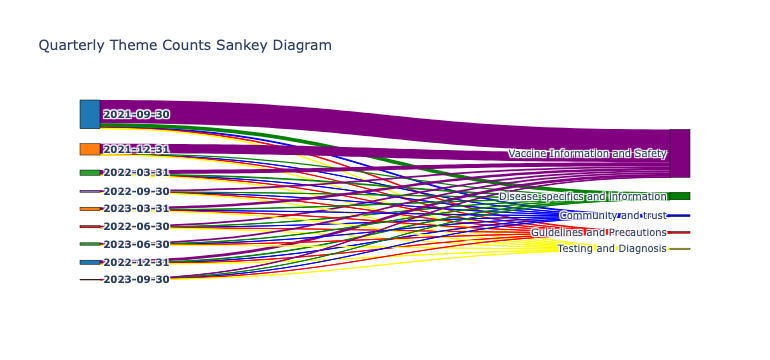

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the data
dq = pd.read_csv('quarterly_theme_counts.csv')

# Set up lists to hold data for the Sankey diagram
source = []
target = []
value = []
label = []
color = []
link_colors = []  # list to hold colors for the links

# Define colors for themes and dates
theme_colors = ["blue", "green", "red", "yellow", "purple"]
date_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # colors for dates

# Assuming the first column in dq is 'date', and other columns are theme names
for i, date in enumerate(dq['date']):
    for j, theme in enumerate(dq.columns[1:]):  # skipping the 'date' column
        source.append(i)
        target.append(len(dq['date']) + j)
        value.append(dq.loc[i, theme])
        link_colors.append(theme_colors[j])
    label.append(date)
    color.append(date_colors[i % len(date_colors)])  # use modulo to ensure we don't go out of range

# Adding theme names to the labels and their colors
label.extend(dq.columns[1:])
color.extend(theme_colors)

# Bold the date labels
label = ['<b>' + lbl + '</b>' if lbl in dq['date'].values else lbl for lbl in label]

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=label, color=color),
    link=dict(source=source, target=target, value=value, color=link_colors)  # adding link colors here
))

# Set the title and display the diagram
fig.update_layout(title_text="Quarterly Theme Counts Sankey Diagram", font_size=10)
fig.show()


In [ ]:
theme_keywords = themes  # Dictionary of themes and their keywords
similarity_threshold = 50  # Adjust this threshold based on your needs
topic_keywords = topic_model.get_topics()
results = []


In [ ]:
# Iterate over each topic
for topic_id, topic_keywords in topic_keywords.items():
    if topic_id >= 0:
        # Find the best matching theme for the current topic
        best_theme = find_best_theme(topic_keywords, theme_keywords, similarity_threshold)
        # Store the topic and its corresponding theme in a list
        topic_description = topic_model.get_representative_docs(topic_id)[0]
        results.append({'Topic': topic_description, 'Theme': best_theme})

# Create a DataFrame from the results
df = pd.DataFrame(results)
df.to_csv('prelim_topic_data_theme_threshold_lang_detect_mecklenburg.csv')

In [ ]:
similarity = fuzz.token_set_ratio(['is', 'vaccine', 's'], "safety")
print(similarity)

33


In [ ]:
#assign only one theme to one topic:
from fuzzywuzzy import fuzz
import pandas as pd



def find_best_theme(topic_keywords, theme_keywords, similarity_threshold):
    best_match = None
    max_similarity = -1

    for theme, keywords in theme_keywords.items():
        for keyword in keywords:
            similarity = fuzz.token_set_ratio(topic_keywords, keyword)
            if similarity > max_similarity:
                max_similarity = similarity
                best_match = theme

    if max_similarity >= similarity_threshold:
        return best_match
    else:
        return None

theme_keywords = themes  # Dictionary of themes and their keywords
similarity_threshold = 50  # Adjust this threshold based on your needs
topic_keywords = topic_model.get_topics()
results = []

# Iterate over each topic
for topic_id, topic_keywords in topic_keywords.items():
    if topic_id >= 0:
        # Find the best matching theme for the current topic
        best_theme = find_best_theme(topic_keywords, theme_keywords, similarity_threshold)
        # Store the topic and its corresponding theme in a list
        topic_description = topic_model.get_representative_docs(topic_id)[0]
        results.append({'Topic': topic_description, 'Theme': best_theme})

# Create a DataFrame from the results
df = pd.DataFrame(results)
df.to_csv('up_prelim_topic_data_theme_threshold_lang_detect_mecklenburg.csv')
